In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib.patches import Rectangle, Circle

plt.rcParams["figure.figsize"] = [8, 8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,meshgrid,arange,array

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib inline

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Review Poll

Let $C$ be a curve in $\mathbb R^2$, $f$ a continuous function, and $a, b$ scalars. What is the difference between these expressions?
$$ \text{(A) } \int_a^b f(x,y)\,dy \qquad \qquad \text{(B) } \int_C f(x,y)\,dy $$

<p style="padding-bottom:40%;"> </p>

# Lecture 19


## The Fundamental Theorem of Line Integrals

  - Objectives
    - Line integrals of (through) vector fields
    - Conservative vector fields
    - Fundamental Theorem of Line Integrals
      - Relation to path-independence
      - Why "conservative"?

  - Resources
    - [Exercises](./L19-Exercises.ipynb) and [Solutions](./L19-Exercises-Solutions.ipynb)
    - Content
      - Stewart: §16.3
      - New Strang:  
        - [§6.3](https://openstax.org/books/calculus-volume-3/pages/6-3-conservative-vector-fields) 
    - Practice
      - Mooculus: [Line Integrals](https://ximera.osu.edu/mooculus/calculus3/lineIntegrals/digInLineIntegrals) 
    - Extras 
      - CalcBLUE: [Path Independence](https://www.youtube.com/watch?v=Wgd8RA-pagQ&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=23) 

<p style="padding-bottom:40%;"> </p>

## Example

Compute the following line integral 
 $$\int_C (x-y)\,dx + xy\,dy$$ where $C$ is the clockwise section of the circle $x^2 + y^2 = 1$ from $(1,0)$ to $(0,1)$. 

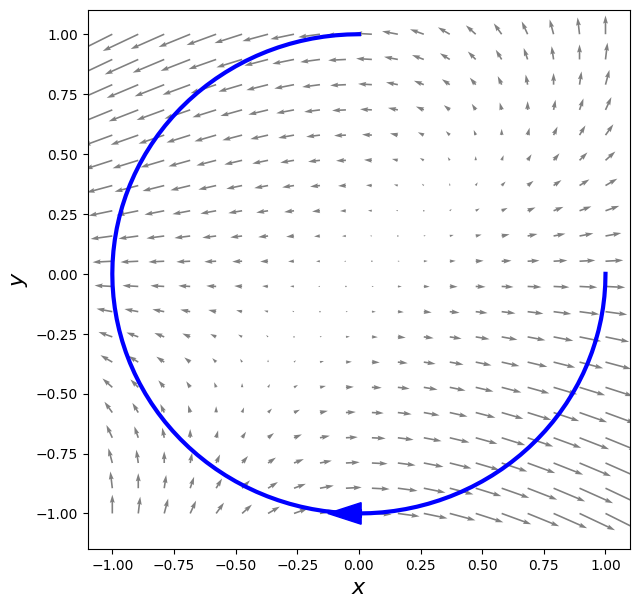

In [2]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x-y,x*y,color='gray');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(0.01,-1,-.001,0,width=.03,color='b')
plt.plot(cos(t*3*pi/2),-sin(t*3*pi/2),'b',lw=3);

<p style="padding-bottom:40%;"> </p>

## Work example

A wagon 5 m away is pulled by a rope from a height 1 m above it with a force of 7 N. How much work is done pulling it the full distance?
<!--![Picture of wagon pulled by rope](../img/wagon.png) -->

In [3]:
@interact(xpos=(0.,5.))
def _(xpos=0):
    fig = plt.figure(figsize = (7.5,3))
    ax = fig.gca()
    ax.plot([0+xpos,5],[0,1],'gray')
    ax.add_patch(Rectangle([-2+xpos,-1/4],2,1/2,color='r',alpha=.3))
    for xx in (-5/3,-1/3):
        ax.add_patch(Circle([xx+xpos,-1/4],1/4,color='gray',alpha=1))
    ax.set_ylim([-1,2])
    ax.set_xlim([-2.5,5])
    ax.arrow(xpos,0,(5-xpos)/norm((5-xpos,1)),1/norm((5-xpos,1)),color='b',width=.03);
    for xi in np.arange(0,xpos,1/2):
        ax.arrow(xi,0,(5-xi)/norm((5-xi,1)),1/norm((5-xi,1)),color='b',width=.03,alpha=.5);

interactive(children=(FloatSlider(value=0.0, description='xpos', max=5.0), Output()), _dom_classes=('widget-in…

<p style="padding-bottom:40%;"> </p>

# Conservative Vector Fields

A vector field $\vec F$ is **conservative** if there exists a scalar field $f$ (with the same domain as $\vec F$ such that $$\vec F = \nabla f$$.

The function $f$ is called a **potential**.

<p style="padding-bottom:40%;"> </p>

### Example

The radial vector field $x \,\vec i + y \vec j$ is conservative. Its potential is $$f(x,y) = \frac{x^2 + y ^2}{2}$$

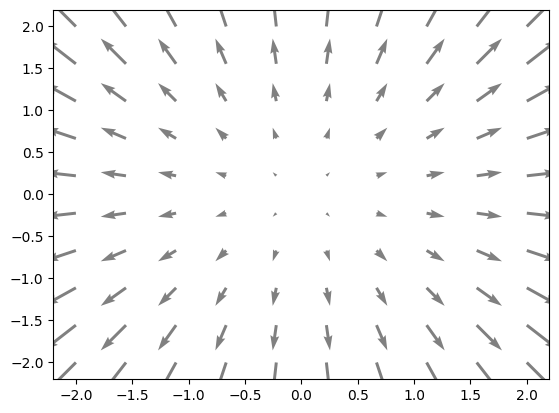

In [4]:
x = y = linspace(-2,2,10)
x,y = meshgrid(x,y)
plt.quiver(x,y,x,y,color='gray');

<p style="padding-bottom:40%;"> </p>

What about the circular vector field $-y\,\vec i + x\, \vec j$?

That is, can we find a scalar field $f(x,y)$ such that $$f_x = -y$$ $$f_y = x$$?

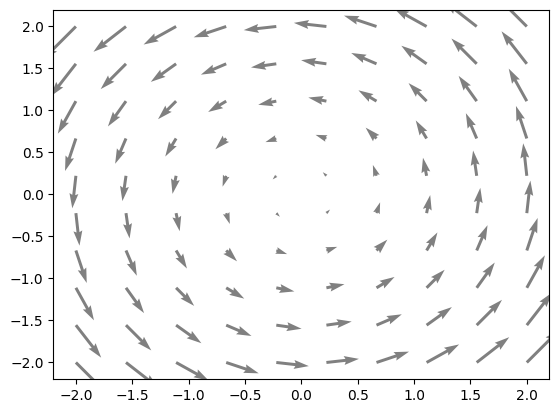

In [5]:
x = y = linspace(-2,2,10)
x,y = meshgrid(x,y)
plt.quiver(x,y,-y,x,color='gray');

<p style="padding-bottom:40%;"> </p>

## No. 

Reason: Clairaut.

$$ f_{xy} = -1 $$
$$ f_{yx} = 1 $$

<p style="padding-bottom:40%;"> </p>

# Example

Which of the following fields is conservative?

  1. $x\,\vec i$
  1. $x\,\vec j$
  1. Both.
  1. Neither.

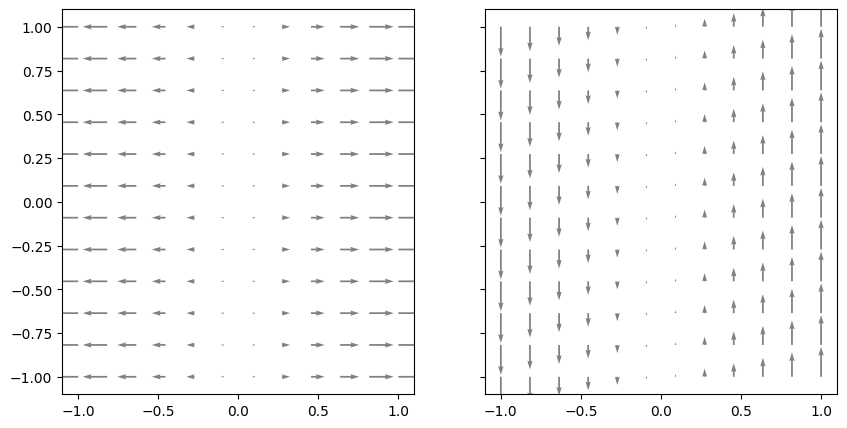

In [6]:
x = y = linspace(-1,1,12)
x,y = meshgrid(x,y)
fig, axs=plt.subplots(1,2,figsize=(10,5),sharey=True)
axs[0].quiver(x,y,x,0,color='gray')
axs[1].quiver(x,y,0,x,color='gray');

<p style="padding-bottom:40%;"> </p>

# A line integral through a conservative vector field

What happens when we combine the last two topics: line integrals and conservative vector fields?

$$\int_C \nabla f \cdot d\vec r $$

where $C$ is a piecewise smooth, oriented curve parametrized by $\vec r(t) = \langle x(t),y(t)\rangle$ for $a\leq t \leq b$ and $f$ is a differentiable function. 


<p style="padding-bottom:40%;"> </p>

$$ = \int_a^b \nabla f(\vec r(t)) \cdot \vec r'(t)\, dt $$

$$ = \int_a^b \left( \frac{\partial f}{\partial x} \frac{dx}{dt} + \frac{\partial f}{\partial y} \frac{dy}{dt} \right)\, dt $$

$$ = \int_a^b (f\circ \vec r)'(t)\, dt $$

$$ = f(\vec r(b)) - f(\vec r(a))$$

<p style="padding-bottom:40%;"> </p>

# The Fundamental Theorem of Line integrals

Let $C$ be a piecewise-smooth, oriented curve from point $(x_1,y_1)$ to point $(x_2,y_2)$ and $\vec F$ a continuous, conservative vector field with potential $f$. (That is, $\nabla f = \vec F$.)  Then, $$\int_C \vec F\cdot d\vec r = f(x_2,y_2) - f(x_1,y_1).$$

In [7]:
@interact
def _(s = (0,1,.05),r = fixed(lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2]))):
    t = np.linspace(0,1,100)
    plt.plot(*r(t),'-r',zorder=2)
    plt.text(-.7,.45,"$C$",fontsize=30,color='r',zorder=2);
    u = np.linspace(-1.2,1.3,18) 
    v = np.linspace(-1,2,18)
    x,y = np.meshgrid(u,v)
    plt.quiver(x,y,2*x,y/2,alpha = (1 - .8*s),color='gray');
    u = np.linspace(-1.2,1.3,55) 
    v = np.linspace(-1,2,55)
    x,y = np.meshgrid(u,v)
    c = plt.contour(x,y,x**2 + y**2/4,alpha=s,levels=arange(.25,3,3/8))
    plt.clabel(c);
#     plt.colorbar();


interactive(children=(FloatSlider(value=0.0, description='s', max=1.0, step=0.05), Output()), _dom_classes=('w…

<p style="padding-bottom:40%;"> </p>

## Theorem

The following statements are equivalent regarding a continuous vector field $\vec F$.

  - $\vec F$ is conservative.

  - $\oint_C \vec F\cdot d\vec r = 0$ on every closed curve $C$.

  - $\int_C \vec F\cdot d\vec r$ depends only on the endpoints of $C$, i.e., is path-independent.

In [8]:
@interact(s = (0,1,.05))
def _(s = 0):
    x = y = linspace(-1,1,18)
    x,y = meshgrid(x,y)
    plt.title("$\\langle y,x \\rangle$",fontsize=20)
    plt.quiver(x,y,y,x,color='gray');    
    c = plt.contour(x,y,x*y,alpha=s,levels=15)
    plt.clabel(c);

interactive(children=(FloatSlider(value=0.0, description='s', max=1.0, step=0.05), Output()), _dom_classes=('w…

<p style="padding-bottom:40%;"> </p>

## Why "conservative"?

In physics, we say a force field $\vec F$ has potential $f$ if $\vec F = -\nabla f$. (Note: this does not change which fields are conservative; it is just a sign convention.)

Let $\vec r(t) $ for $t \in [a,b]$ be the position of a particle with mass $m$ moving in this force field. We compute the work done by the force in two ways. 

$$ \int_C \vec F\cdot d\vec r = \int_a^b \vec F(\vec r(t))\cdot \vec r'(t)\,dt $$

using $\vec F = m \vec a = m \vec r''(t) $,

$$ = \int_a^b m\vec r''(t)\cdot \vec r'(t)\,dt $$

Here's the key step: 

$$ = \int_a^b \frac{d}{dt}\left( \frac 12 m\, \vec r'(t)\cdot \vec r'(t) \right)\,dt $$

$$= \frac 12 m\, \vec r'(b)\cdot \vec r'(b) - \frac 12\, m \vec r'(a)\cdot \vec r'(a) $$

$$= \frac12m |\vec v(b)|^2 - \frac12 m|\vec v(a)|^2 $$

A second way:

$$ \int_C \vec F\cdot d\vec r = \int_C -\nabla f\cdot d\vec r $$

using FTLI,

$$ = -f(\vec r(b)) + f(\vec r(a)) $$

Putting these together we get...

#### Conservation of Energy

$$ f(\vec r(a)) + \frac12m|\vec v(a)|^2 =  f(\vec r(b)) + \frac12m|\vec v(b)|^2 $$